<>:83: SyntaxWarning: invalid escape sequence '\D'
<>:83: SyntaxWarning: invalid escape sequence '\D'
/var/folders/rl/0fstgkgs7t93dk9q8yhnw9lc0000gs/T/ipykernel_70277/676972844.py:83: SyntaxWarning: invalid escape sequence '\D'
  ax1.plot(time_days-10, tt_Rb * ps_x / 1000, label=f'$\Delta x$ = {vDx[i]:.1f} m', linewidth=1.0)


Case 0: n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX3e1_convergence
  tt_t dtype: float64, shape: (2009,)
  tt_Rb dtype: float64, shape: (2009,)
  Final Rb: 0.187500
  Reference solution (error = 0)
Case 1: n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX6e1_convergence
  tt_t dtype: float64, shape: (2011,)
  tt_Rb dtype: float64, shape: (2011,)
  Final Rb: 0.262500
  L2 error: 8.317914e-03
Case 2: n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX1e2_convergence
  tt_t dtype: float64, shape: (10001,)
  tt_Rb dtype: float64, shape: (10001,)
  Final Rb: 0.825000
  L2 error: 2.448696e-02
Case 3: n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX2e2_convergence
  tt_t dtype: float64, shape: (10001,)
  tt_Rb dtype: float64, shape: (10001,)
  Final Rb: 0.825000
  L2 error: 7.179448e-02
Case 4: n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX5e2_convergence
  tt_t dtype: float64, shape: (10001,)
  tt_Rb dtype: float64, shape: (10001,)
  Final Rb: 0.800000
  L2 error: 1.898508e-01
Case 5: n1d_E0_mu1e_03_kappa1e_99_V1

/var/folders/rl/0fstgkgs7t93dk9q8yhnw9lc0000gs/T/ipykernel_70277/676972844.py:124: RuntimeWarning: invalid value encountered in power
  Rb_analytical = (291.125*(B*h0**0.5*V0**(5/2)/mu_eff)*((time_days-tt0)*pd_td))**(2/17)


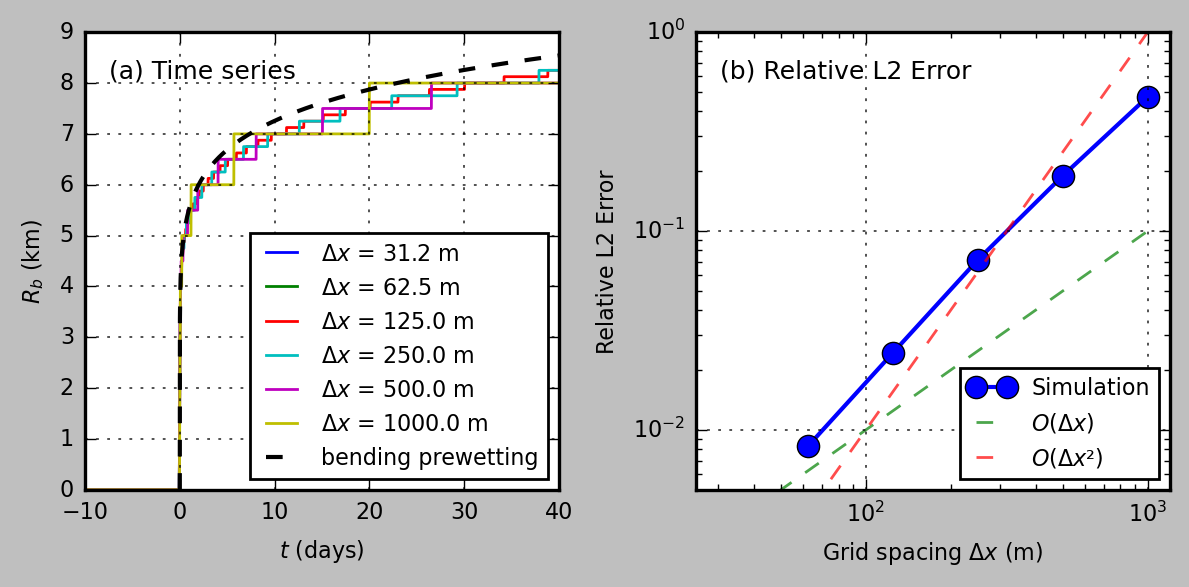

In [3]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

results_dir = './results'
casenames1 = ['n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX3e1_convergence',
             'n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX6e1_convergence',
             'n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX1e2_convergence',
             'n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX2e2_convergence',
             'n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX5e2_convergence',
             'n1d_E0_mu1e_03_kappa1e_99_V1e7_theta0e00_DX1e3_convergence']

vDx1 = np.array([31.25, 62.5, 125, 250, 500, 1000])  # m
# casenames = ['n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_02_DX3e1_convergence',
#              'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_02_DX6e1_convergence',
#              'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_02_DX1e2_convergence',
#              'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_02_DX2e2_convergence',
#              'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_02_DX5e2_convergence',
#              'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_02_DX1e3_convergence']

casenames2 = ['n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_03_DX2e1_convergence',
             'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_03_DX3e1_convergence',
             'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_03_DX6e1_convergence',
             'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_03_DX1e2_convergence',
             'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_03_DX2e2_convergence',
             'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_03_DX5e2_convergence',
             'n1d_E0_mu1e0_kappa1e_99_V1e7_theta1e_03_DX1e3_convergence']

vDx2 = np.array([15.625, 31.25, 62.5, 125, 250, 500, 1000])  # m


casenames = casenames1
vDx = vDx1

def convert_to_numeric(obj_array):
    if obj_array.dtype == 'O':
        try:
            return np.array(obj_array, dtype=float)
        except:
            return np.array([float(x) for x in obj_array])
    else:
        return obj_array.astype(float)

res = []
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), dpi=100)
plt.style.use('classic')
plt.rcParams["figure.dpi"] = 600
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['lines.linewidth'] = 0.6
plt.rcParams['grid.linewidth'] = 0.6
plt.rcParams['axes.labelsize'] = 8 
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
%config InlineBackend.figure_format = 'retina'  # high res for retina displays

for i, casename in enumerate(casenames):
    try:
        mat_path = os.path.join(results_dir, casename, casename + '.mat')
        raw = sio.loadmat(mat_path, squeeze_me=True)

        tt = raw['tt']
        ps = raw['ps']
        pd = raw['pd']

        ps_t = float(ps['t']) if hasattr(ps['t'], '__iter__') == False else float(ps['t'].item())
        pd_td = float(pd['td']) if hasattr(pd['td'], '__iter__') == False else float(pd['td'].item())
        ps_x = float(ps['x']) if hasattr(ps['x'], '__iter__') == False else float(ps['x'].item())

        tt_t = convert_to_numeric(np.array(tt['t']))
        tt_Rb = convert_to_numeric(np.array(tt['Rb']))
        tt_Vb = convert_to_numeric(np.array(tt['Vb']))
        
        print(f"Case {i}: {casename}")
        print(f"  tt_t dtype: {tt_t.dtype}, shape: {tt_t.shape}")
        print(f"  tt_Rb dtype: {tt_Rb.dtype}, shape: {tt_Rb.shape}")
        print(f"  Final Rb: {tt_Rb[-1]:.6f}")

        time_days = tt_t * ps_t / pd_td
        ax1.plot(time_days-10, tt_Rb * ps_x / 1000, label=f'$\Delta x$ = {vDx[i]:.1f} m', linewidth=1.0)

        if i == 0:
            tt_t_fine = tt_t.copy()
            tt_Rb_fine = tt_Rb.copy()
            res.append(0.0)
            print(f"  Reference solution (error = 0)")
        else:
            if len(tt_t) != len(tt_t_fine):
                tt_Rb_interp = np.interp(tt_t_fine, tt_t, tt_Rb)
            else:
                tt_Rb_interp = tt_Rb

            diff = np.linalg.norm(tt_Rb_interp - tt_Rb_fine) / np.linalg.norm(tt_Rb_fine)
            # diff = np.linalg.norm(tt_Rb_interp[-1] - tt_Rb_fine[-1]) / np.linalg.norm(tt_Rb_fine[-1])
            res.append(diff)
            print(f"  L2 error: {diff:.6e}")

    except Exception as e:
        print(f"Error processing {casename}: {e}")
        res.append(np.nan)

mu = pd['mu'] if hasattr(pd['mu'], '__iter__') == False else pd['mu'].item()
rhow = pd['rho_w'] if hasattr(pd['rho_w'], '__iter__') == False else pd['rho_w'].item()
g = pd['g'] if hasattr(pd['g'], '__iter__') == False else pd['g'].item()
theta = 0e-3
V0 = 1e2
B = 8.8e9*1000**3/(12*(1-0.33**2))
h0 = 1e-3
mu_eff = 1e-3

# find the time when Vb reaches its maximum
tmax_idx = np.argmax(tt_Vb)
Vmax = tt_Vb[tmax_idx]
# tinit = np.where(tt_Vb >= 0.9999*0.1)[0][0]
tinit = np.where(tt_t >= 10*pd_td/ps_t)[0][0]
Rb0 = tt_Rb[tinit]
tt0 = time_days[tinit]
print(f"tinit: {tt0}, Rb0: {Rb0}, Vmax: {Vmax*1e8/1e5}")

# Rb_analytical = 1.43*(B*h0**0.5*V0**2.5/mu_eff)**(1/11)*((time_days-tt0)*pd_td)**(1/11) + Rb0 *ps_x
Rb_analytical = (291.125*(B*h0**0.5*V0**(5/2)/mu_eff)*((time_days-tt0)*pd_td))**(2/17)
ax1.plot(time_days-10, Rb_analytical/1e3, 'k--', label='bending prewetting', linewidth=1.5)

# ax1.set_xlim([2e0, 0.3e2])
# ax1.set_ylim([5e0, 0.5e1])  
ax1.set_xlabel(r'$t$ (days)')
ax1.set_ylabel(r'$R_b$ (km)')
# ax1.set_title('Blister Radius Evolution')
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(True, alpha=0.8)
ax1.text(0.05,0.90, r'(a) Time series', fontsize=9, color='black', transform=ax1.transAxes)

ax2.loglog(vDx[1:], np.array(res)[1:], 'o-', 
           label='Simulation', linewidth=1.5, markersize=8)
ax2.loglog(vDx, 1e-4*vDx**1, '--', label=r'$O(\Delta x)$', linewidth=1.0, alpha=0.7)
ax2.loglog(vDx, 1e-6*vDx**2, '--', label=r'$O(\Delta x²)$', linewidth=1.0, alpha=0.7)

ax2.set_xlabel(r'Grid spacing $\Delta x$ (m)')
ax2.set_ylabel('Relative L2 Error')
# ax2.set_title('Convergence Analysis')
ax2.set_xlim([0.8*min(vDx), max(vDx)*1.2])
ax2.set_ylim([5e-3, 1e0])
ax2.legend(loc='lower right', fontsize=8)
ax2.grid(True, alpha=0.8)
ax2.text(0.05,0.90, r'(b) Relative L2 Error', fontsize=9, color='black', transform=ax2.transAxes)

plt.tight_layout()
fig.savefig(
    './figures/Fig8_convergence_1.png',
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    pad_inches=0.1
)
plt.show()


<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:69: SyntaxWarning: invalid escape sequence '\D'
/var/folders/rl/0fstgkgs7t93dk9q8yhnw9lc0000gs/T/ipykernel_70277/3387471842.py:69: SyntaxWarning: invalid escape sequence '\D'
  label=f'$\Delta x$ = {vDx[i]:.2f} m', linewidth=1.0)


Case 0: n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX3e1_convergence
  tt_t dtype: float64, shape: (10111,)
  tt_Rb dtype: float64, shape: (10111,)
  Final Rb: 0.565625
  Reference solution (error = 0)
Case 1: n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX6e1_convergence
  tt_t dtype: float64, shape: (10085,)
  tt_Rb dtype: float64, shape: (10085,)
  Final Rb: 0.568750
  L2 error: 9.835848e-03
Case 2: n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX1e2_convergence
  tt_t dtype: float64, shape: (10001,)
  tt_Rb dtype: float64, shape: (10001,)
  Final Rb: 0.612500
  L2 error: 7.653067e-02
Case 3: n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX2e2_convergence
  tt_t dtype: float64, shape: (10001,)
  tt_Rb dtype: float64, shape: (10001,)
  Final Rb: 0.675000
  L2 error: 1.738112e-01
Case 4: n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX5e2_convergence
  tt_t dtype: float64, shape: (10001,)
  tt_Rb dtype: float64, shape: (10001,)
  Final Rb: 0.700000
  L2 error: 2.668659e-01
Case 5: n1d_E0_mu1e1_kappa1e_99_V1e7_

/var/folders/rl/0fstgkgs7t93dk9q8yhnw9lc0000gs/T/ipykernel_70277/3387471842.py:115: RuntimeWarning: invalid value encountered in power
  Rb_frac = 3/(2**(2/3))*(rhow*g*theta*V0**2/(12*mu_eff))**(1/3)*((time_days-tt0)*pd_td)**(1/3) + 0*Rb0 *ps_x


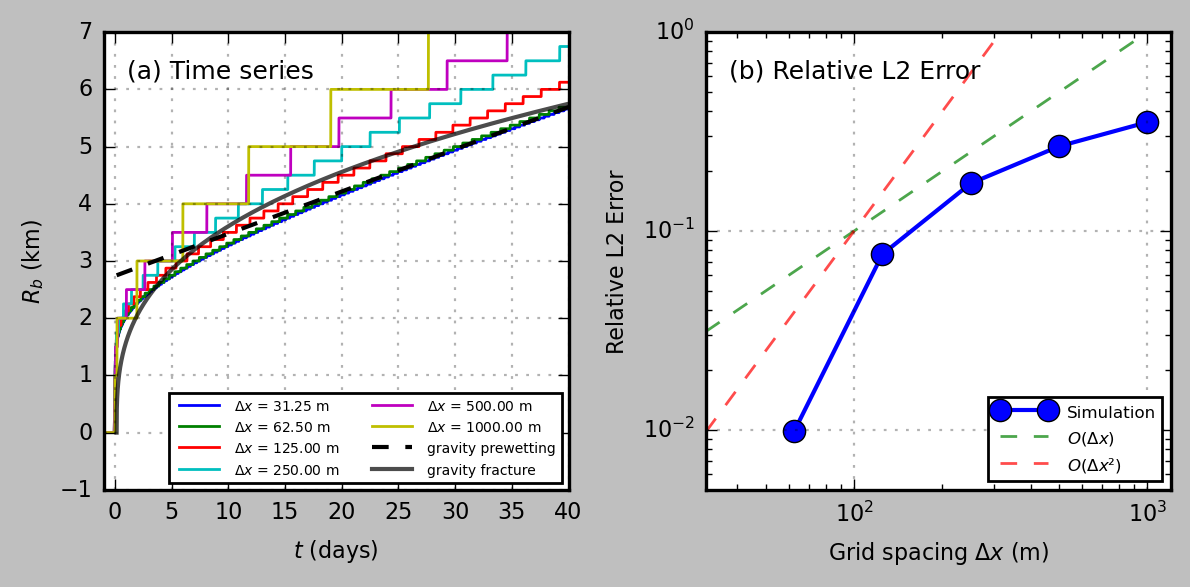

In [11]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

results_dir = './results'

casenames2 = ['n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX3e1_convergence',
             'n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX6e1_convergence',
             'n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX1e2_convergence',
             'n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX2e2_convergence',
             'n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX5e2_convergence',
             'n1d_E0_mu1e1_kappa1e_99_V1e7_theta1e_02_DX1e3_convergence']

vDx2 = np.array([31.25, 62.5, 125, 250, 500, 1000])  # m

casenames = casenames2
vDx = vDx2

def convert_to_numeric(obj_array):
    if obj_array.dtype == 'O':
        try:
            return np.array(obj_array, dtype=float)
        except:
            return np.array([float(x) for x in obj_array])
    else:
        return obj_array.astype(float)

res = []
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), dpi=100)
plt.style.use('classic')
plt.rcParams["figure.dpi"] = 600
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['lines.linewidth'] = 0.6
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['axes.labelsize'] = 8 
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
%config InlineBackend.figure_format = 'retina'  # high res for retina displays

for i, casename in enumerate(casenames):
    try:
        mat_path = os.path.join(results_dir, casename, casename + '.mat')
        raw = sio.loadmat(mat_path, squeeze_me=True)

        tt = raw['tt']
        ps = raw['ps']
        pd = raw['pd']

        ps_t = float(ps['t']) if hasattr(ps['t'], '__iter__') == False else float(ps['t'].item())
        pd_td = float(pd['td']) if hasattr(pd['td'], '__iter__') == False else float(pd['td'].item())
        ps_x = float(ps['x']) if hasattr(ps['x'], '__iter__') == False else float(ps['x'].item())

        tt_t = convert_to_numeric(np.array(tt['t']))
        tt_Rb = convert_to_numeric(np.array(tt['Rb']))
        tt_Vb = convert_to_numeric(np.array(tt['Vb']))
        # tt_Rb = convert_to_numeric(np.array(tt['Rb']))
        
        print(f"Case {i}: {casename}")
        print(f"  tt_t dtype: {tt_t.dtype}, shape: {tt_t.shape}")
        print(f"  tt_Rb dtype: {tt_Rb.dtype}, shape: {tt_Rb.shape}")
        print(f"  Final Rb: {tt_Rb[-1]:.6f}")

        time_days = tt_t * ps_t / pd_td
        ax1.plot(time_days-10, tt_Rb * ps_x / 1000, 
                label=f'$\Delta x$ = {vDx[i]:.2f} m', linewidth=1.0)

        if i == 0:
            tt_t_fine = tt_t.copy()
            tt_Rb_fine = tt_Rb.copy()
            res.append(0.0)
            print(f"  Reference solution (error = 0)")
        else:
            if len(tt_t) != len(tt_t_fine):
                tt_Rb_interp = np.interp(tt_t_fine, tt_t, tt_Rb)
            else:
                tt_Rb_interp = tt_Rb

            diff = np.linalg.norm(tt_Rb_interp - tt_Rb_fine) / np.linalg.norm(tt_Rb_fine)
            # diff = np.linalg.norm(tt_Rb_interp[-1] - tt_Rb_fine[-1]) / np.linalg.norm(tt_Rb_fine[-1])
            res.append(diff)
            print(f"  L2 error: {diff:.6e}")

    except Exception as e:
        print(f"Error processing {casename}: {e}")
        res.append(np.nan)

mu = pd['mu'] if hasattr(pd['mu'], '__iter__') == False else pd['mu'].item()
rhow = pd['rho_w'] if hasattr(pd['rho_w'], '__iter__') == False else pd['rho_w'].item()
g = pd['g'] if hasattr(pd['g'], '__iter__') == False else pd['g'].item()
theta = 1e-2
V0 = 1e2
B = 8.8e9*(1000**3)/(12*(1-0.33**2))
h0 = 1e-3
mu_eff = 1e1
t_drainage = 10  # days
# find the time when Vb reaches its maximum
tmax_idx = np.argmax(tt_Vb)
Vmax = tt_Vb[tmax_idx]
tinit = np.where(tt_Vb >= 0.1)[0][0]
Rb0 = tt_Rb[tinit]
tt0 = time_days[tinit]
print(f"tinit: {tt0}, Rb0: {Rb0}, Vmax: {Vmax*1e8/1e5}")

# Rb_analytical = 1.43*(B*h0**0.5*V0**2.5/mu_eff)**(1/11)*((time_days-tt0)*pd_td)**(1/11) + Rb0 *ps_x
# Rb_analytical = (291*(B*h0**0.5*V0**(5/2)/mu_eff)*((time_days-tt0)*pd_td) + (Rb0 *ps_x)**(17/2))**(2/17)
# ax1.plot(time_days[tinit:]-t_drainage, Rb_analytical[tinit:]/1e3, 'k:', label='bending prewetting', linewidth=1.5)

Rb_analytical_gravity = ((rhow*g*np.sin(theta)*V0)**1.25)*(h0**0.5)/(12*mu_eff*B**0.25)*((time_days-tt0)*pd_td) + Rb0 *ps_x
ax1.plot(time_days[tinit:]-t_drainage, 1.75+Rb_analytical_gravity[tinit:]/1e3, 'k--', label='gravity prewetting', linewidth=1.5)

Rb_frac = 3/(2**(2/3))*(rhow*g*theta*V0**2/(12*mu_eff))**(1/3)*((time_days-tt0)*pd_td)**(1/3) + 0*Rb0 *ps_x
ax1.plot(time_days[tinit:]-t_drainage, Rb_frac[tinit:]/1e3, 'k-', label='gravity fracture', linewidth=1.5, alpha=0.7)
# ax1.loglog(time_days,0.75*(time_days-5)**(1/3), label=r'Reference $t^{1/3}$', linestyle='--', color='k', linewidth=1.5)
ax1.set_xlim([-1, 40])
ax1.set_ylim([-1, 7])  
ax1.grid(alpha=0.3)
 

ax1.set_xlabel(r'$t$ (days)')
ax1.set_ylabel(r'$R_b$ (km)')
# ax1.set_title('Blister Front Evolution')
ax1.legend(loc='lower right', fontsize=5,ncol=2,
          handlelength=3.5,
          handleheight=1.1,
          labelspacing=0.5)

ax1.text(0.05,0.90, r'(a) Time series', fontsize=9, color='black', transform=ax1.transAxes)

ax2.loglog(vDx[1:], np.array(res)[1:], 'o-', 
           label='Simulation', linewidth=1.5, markersize=8)
ax2.loglog(vDx, 1e-3*vDx**1, '--', linewidth=1.0,label=r'$O(\Delta x)$', alpha=0.7)
ax2.loglog(vDx, 1e-5*vDx**2, '--', label=r'$O(\Delta x²)$', linewidth=1.0, alpha=0.7)

ax2.set_xlabel(r'Grid spacing $\Delta x$ (m)')
ax2.set_ylabel('Relative L2 Error')
# ax2.set_title('Convergence Analysis')
ax2.set_xlim([min(vDx), max(vDx)*1.2])
ax2.set_ylim([5e-3, 1e0])
ax2.text(0.05,0.90, r'(b) Relative L2 Error', fontsize=9, color='black', transform=ax2.transAxes)
ax2.legend(loc='lower right', fontsize=6, ncol=1,
          handlelength=3.5,
          handleheight=1.2,
          labelspacing=0.5)
ax2.grid(alpha=0.3)


plt.tight_layout()

fig.savefig(
    './figures/Fig9_convergence_2.png',
    dpi=600,
    transparent=False,
    bbox_inches='tight',
    pad_inches=0.1
)

plt.show()


In [14]:
291**(2/17)

1.9492599664047692